## Coeficiente de correlación de Pearson

### 1. Objetivos:
    - Aprender a interpretar el coeficiente de correlación de Pearson

---
    
## Desarrollo:

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style('white')

El coeficiente de correlación de Pearson cuantifica la correlación entre dos variables numéricas. Dos variables tienen una correlación si tienen cierta dependencia la una de la otra. Este coeficiente sólo mide las relaciones lineales, es decir, que pueden ser representadas con una línea.

El rango de valores posibles es el intervalo entre -1 y 1.

---

Un valor de -1 significa que hay una correlación negativa perfecta. Esto quiere decir que el aumento de una variable resulta en la disminución de la otra; y viceversa. Podemos graficar la relación entre dos variables con una *gráfica de dispersión*, o *scatterplot*, donde cada punto representa la intersección entre un valor de la variable `x` y un valor de la variable `y`. Si unimos los puntos con una línea que representa la relación entre las dos variables, una correlación de -1 se vería de la siguiente manera:

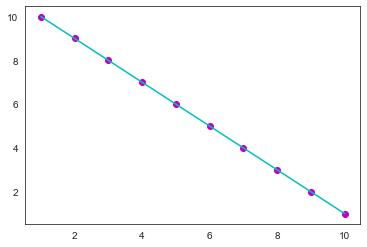

In [ ]:
arr_1_1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
arr_1_2 = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

plt.scatter(arr_1_1, arr_1_2, c='m');
plt.plot(arr_1_1, arr_1_2, c='c');

---

Un valor de 1 significa que hay una correlación positiva perfecta. Esto quiere decir que el aumento de una variable resulta en el aumento de la otra; y la disminución de una variable resulta en la disminución de la otra. Esta relación se vería de la siguiente manera:

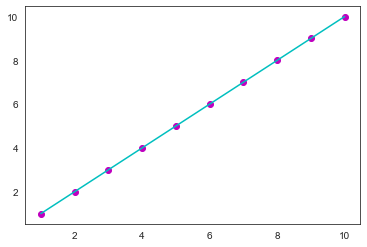

In [ ]:
arr_2_1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
arr_2_2 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.scatter(arr_2_1, arr_2_2, c='m');
plt.plot(arr_2_1, arr_2_2, c='c');

---

En cambio, un valor de 0 implica que no existe ninguna correlación entre las variables. Son completamente independientes la una de la otra. Si cada muestra es un punto formado por un valor de la variable x y un valor de la variable y, podríamos visualizar esta falta de relación de esta manera:

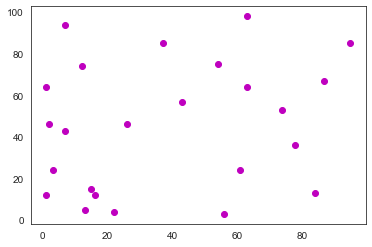

In [ ]:
arr_3_1 = pd.Series([1, 7, 1, 22, 54, 2, 7, 26, 3, 13, 37, 87, 63, 15, 16, 74, 56, 95, 78, 61, 12, 43, 63, 84])
arr_3_2 = pd.Series([64, 43, 12, 4, 75, 46, 94, 46, 24, 5, 85, 67, 98, 15, 12, 53, 3, 85, 36, 24, 74, 57, 64, 13])

plt.scatter(arr_3_1, arr_3_2, c='m');

Como puedes ver, no hay manera de agregar una línea recta que represente la relación entre las dos variables.

---

Podemos utilizar el método `corr` de `pandas` para calcular el coeficiente de correlación de Pearson:

In [ ]:
print(f'Correlación entre las primeras dos Series: {arr_1_1.corr(arr_1_2)}')

Correlación entre las primeras dos Series: -0.9999999999999999


In [ ]:
print(f'Correlación entre las segundas dos Series: {arr_2_1.corr(arr_2_2)}')

Correlación entre las segundas dos Series: 0.9999999999999999


In [ ]:
print(f'Correlación entre las terceras dos Series: {arr_3_1.corr(arr_3_2)}')

Correlación entre las terceras dos Series: 0.22134946355611293


---

Obviamente las relaciones entre variables en el mundo real nunca son tan evidentes y perfectas como éstas. El coeficiente de correlación de Pearson simplemente nos ayuda a distinguir la naturaleza de la correlación (si es negativa, positiva o inexistente) y la fuerza de la correlación (qué tan cerca o lejos está de -1 o 1). Este coeficiente no tiene dirección, es decir, si la variable `a` y la variable `b` tienen un coeficiente de 8, podemos interpretarlo como que un aumento en la variable `a` implica comunmente un aumento de la variable `b`, **y también** podemos decir que un aumento en la variable `b` implica comunmente un aumento en la variable `a`.

---

**- La correlación no implica necesariamente causalidad.**

Es decir, el hecho de que haya una correlación alta entre dos variables no significa que una de las variables cause a la otra. Incluso podría suceder que la correlación se deba al azar y en realidad las variables son totalmente independientes la una de la otra.

**- El coeficiente de correlación es muy sensible a valores atípicos.**

Si hay valores atípicos en nuestro conjunto de datos, esto puede cambiar drásticamente el valor de nuestro coeficiente. Es por eso que siempre es importante trabajar con nuestros valores atípicos antes de investigar la relación entre las variables.

##  Matriz de correlaciones y mapas de calor

### 1. Objetivos:
    - Aprender a generar matrices de correlaciones y mapas de calor para cuantificar el coeficiente de correlación de Pearson de múltiples variables al mismo tiempo.

---
    
### 2. Desarrollo:

Analicemos un poco el siguiente dataset:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../../Datasets/diabetes-clean.csv', index_col=0)

In [ ]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Este dataset tiene muchas variables numéricas que se prestan a la aplicación de nuestro coeficiente de correlación de Pearson.

Antes de aplicarlo, removeré la variable dependiente ('outcome'), dado que es una variable binaria no apta para este tipo de análisis.

In [ ]:
df_filtered = df.drop(columns=['outcome'])

In [ ]:
df_filtered.corr()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


Tan fácil como esto. Como puedes observar, es un poco difícil discernir las distintas correlaciones de esta manera. Digamos que no 'saltan' a la vista.

Un par de cosas que podemos observar es que:

1. Hay una diagonal de 1s a la mitad de la matriz, donde cada variable se relaciona consigo misma.
2. Hay redundancia de datos debajo y arriba de la diagonal.

Usemos ahora un mapa de calor para visualizar esta matriz de una manera más fácil de interpretar:

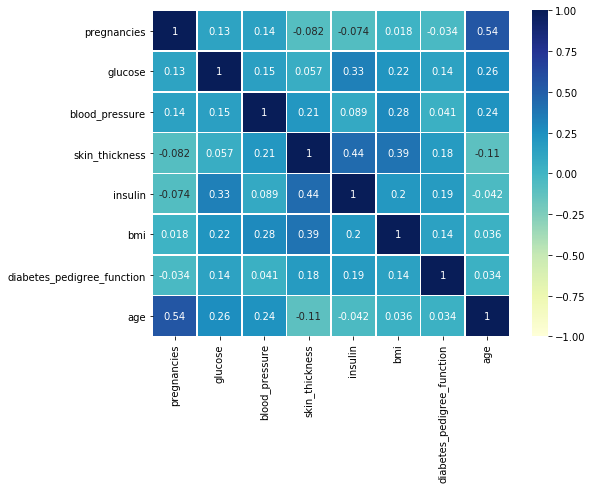

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

Resulta mucho más sencillo visualizar las relaciones entre variables, ¿no es así?

¿Qué variables tienen correlaciones negativas? ¿Qué variables tienen correlaciones positivas? ¿Qué variables no tienen correlación?

Recuerda que estamos cuantificando la relación lineal entre dos variables. Esto significa que podría existir algún tipo de relación no lineal que no estamos visualizando con este mapa.

## Gráficas de dispersión

### 1. Objetivos:
    - Aprender a realizar gráficas de dispersión

---
    
### 2. Desarrollo:

Las gráficas de dispersión, como ya viste en los ejemplos anteriores, nos ayudan a visualizar la relación entre dos variables numéricas. Veamos unos ejemplos:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../../Datasets/diabetes-clean.csv', index_col=0)

In [ ]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Vimos que insulina y glucosa tenían una correlación positiva de 0.33. Esta correlación lineal es bastante débil en realidad. Así se ven ambas variables en una gráfica de dispersión:

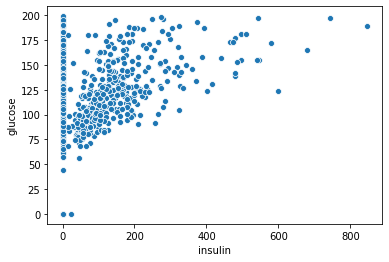

In [ ]:
sns.scatterplot(df['insulin'], df['glucose'])

In [ ]:
df['insulin'].corr(df['glucose'])

0.33135710992020945

Podemos ver algo curioso en esta gráfica: En el valor `0` de 'insulin', podemos observar que los valores 'glucose' encontrados abarcan todo el rango posible. Esto es algo extraño. A menos que uno de ustedes sea doctor y sepa que esto tiene sentido, creo que podríamos elaborar la hipótesis de que los valores `0` en 'insulin' representan una falta de datos o un error de medición y no un valor real. Esta hipótesis la podemos elaborar simplemente al observar que la gráfica tiene una anomalía en ese lugar. Veamos qué pasa si removemos los valores `0` en 'insulin':

In [ ]:
df_no_zeros = df[df['insulin'] > 0]

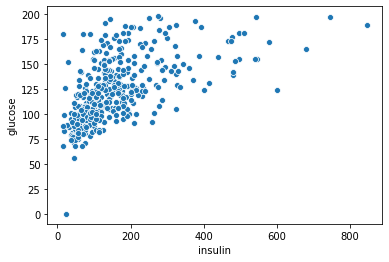

In [ ]:
sns.scatterplot(df_no_zeros['insulin'], df_no_zeros['glucose'])

In [ ]:
df_no_zeros['insulin'].corr(df_no_zeros['glucose'])

0.5800099317152833

Interesante, ¿no crees? Obviamente para realizar una hipótesis coherente necesitaríamos ser médicos (si alguien es médico aquí, por favor demuestre que hemos cometido un grave error), pero como puedes ver, tan sólo con visualizar la relación entre estos dos datos ya vimos algunas preguntas emerger.

---

Veamos qué hay entre las variables 'bmi' y 'glucose':

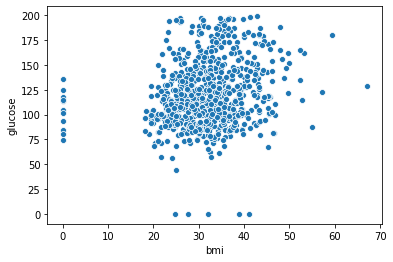

In [ ]:
sns.scatterplot(df['bmi'], df['glucose'])

In [ ]:
df['bmi'].corr(df['glucose'])

0.221071069458983

Otra vez tenemos este fenómeno extraño donde hay algunos valores en `0` que seguramente están ahí por error. También vamos a realizar una pequeña apuesta y eliminar algunos valores de 'bmi' que parecen ser atípicos. Veamos cómo cambia nuestra gráfica:

In [ ]:
bmi_greater_than_zero = (df['bmi'] > 0) & (df['bmi'] < 55)
glucose_greater_than_zero = df['glucose'] > 0
df_no_zeros_2 = df[bmi_greater_than_zero & glucose_greater_than_zero]

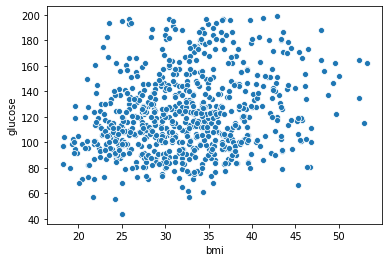

In [ ]:
sns.scatterplot(df_no_zeros_2['bmi'], df_no_zeros_2['glucose'])

In [ ]:
df_no_zeros_2['bmi'].corr(df_no_zeros_2['glucose'])

0.23706994033365764

En este caso nuestro coeficiente de correlación mejoró pero no mucho. Es notable que la relación entre estas dos variables es bastante débil (si es que existe).

---

Vamos a revisar 'insulin' y 'skin_thickness' que tuvieron un coeficiente de 0.44:

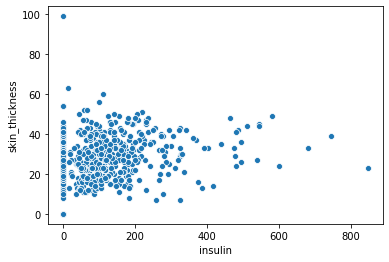

In [ ]:
sns.scatterplot(df['insulin'], df['skin_thickness'])

In [ ]:
df['insulin'].corr(df['skin_thickness'])

0.43678257012001387

Ya sabemos que insulin tiene valores `0` que probablemente sean erróneos, así que usaremos nuestro DataFrame `df_no_zeros` para eliminarlos:

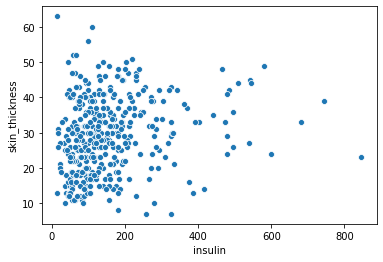

In [ ]:
sns.scatterplot(df_no_zeros['insulin'], df_no_zeros['skin_thickness'])

In [ ]:
df_no_zeros['insulin'].corr(df_no_zeros['skin_thickness'])

0.18488842018975898

¡¿Qué ha pasado aquí?! Un coeficiente de 0.4367 disminuyó a 0.1848 cuando eliminamos algunos valores que creemos son erróneos. Esto es una gran demostración de cómo nunca podemos confiar en una sola medida para realizar nuestras hipótesis. Con este dataset la verdad es que estamos explorando un poco a ciegas porque se requiere de conocimientos muy especializados para entender qué está pasando en realidad, pero resulta interesante que aún sin saber exactamente qué significan las variables, de todas maneras podemos encontrar comportamientos que generan muchas preguntas.

Otra pregunta que me interesa plantearme es si acaso la relación entre estas dos variables podría mejorar si eliminamos los valores atípicos de 'insulin':

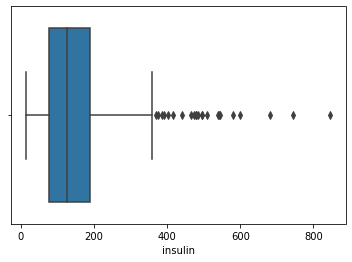

In [ ]:
sns.boxplot(df_no_zeros['insulin'])

In [ ]:
iqr_insulin = df_no_zeros['insulin'].quantile(0.75) - df_no_zeros['insulin'].quantile(0.25)
filter_upper_outliers = df_no_zeros['insulin'] < (df_no_zeros['insulin'].quantile(0.75) + iqr_insulin * 1.5)
df_insulin_no_outliers = df_no_zeros[filter_upper_outliers]

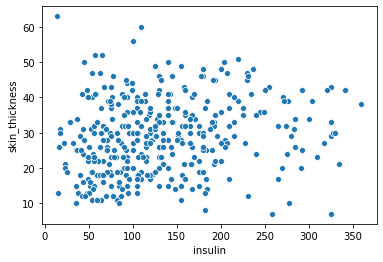

In [ ]:
sns.scatterplot(df_insulin_no_outliers['insulin'], df_insulin_no_outliers['skin_thickness'])

In [ ]:
df_insulin_no_outliers['insulin'].corr(df_insulin_no_outliers['skin_thickness'])

0.18403514086196654

## Regresión Lineal Simple

### 1. Objetivos:
    - Entender el concepto detrás de la regresión lineal simple y cómo entrenar un modelo usando scikit-learn

---
    
### 2. Desarrollo:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### a) Teoría

El coeficiente de correlación de Pearson cuantifica la fuerza y la dirección de la relación entre dos variables. La dirección se representa con el signo de nuestro resultado, mientras que la fuerza depende de qué tan cerca de -1 o 1 esté nuestro valor. Como ya dijimos antes, en el coeficiente de correlación de Pearson la variable `x` y la variable `y` son intercambiables.

La Regresión Linear Simple, en cambio, lo que intenta hacer es encontrar una función que nos permita predecir una de las variables a partir de la otra.

---

Lo primero que tenemos que hacer es decidir cuál va a ser nuestra variable independiente y cuál la dependiente. La variable independiente es la que se usa para predecir a la otra; le llamamos independiente porque podemos cambiarla sin condición alguna. La variable dependiente es la variable que queremos predecir; la llamamos dependiente porque estamos asumiendo que el valor que tome 'depende' del valor de la otra variable. Si usamos una gráfica de dispersión para graficar ambas variables, la variable independiente se grafica en el eje `x` y la dependiente en el eje `y`. Para ejemplificar, imaginemos que tenemos un dataset que se ve así:

In [ ]:
serie_1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
serie_2 = pd.Series([2, 1, 7.8, 3, 19, 10, 14.7, 18, 19.3, 24.5, 20.5, 21, 23.8, 34.4, 18, 48.3, 32.7, 34, 41, 30.3, 20, 32, 48, 29, 45, 53, 63, 43, 54, 48])

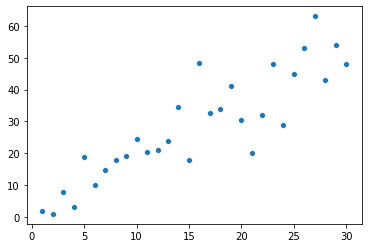

In [ ]:
sns.scatterplot(serie_1, serie_2);

Lo primero que vale la pena hacer es sacar el coeficiente de correlación de Pearson entre ambas variables. Esto nos dará un indicador de la existencia (o inexistencia) de una relación entre las variables y de la fuerza de esta relación:

In [ ]:
serie_1.corr(serie_2)

0.8849529343548095

Con un coeficiente como éste, es evidente que la relación entre las variables es fuerte. Vale la pena entonces intentar usar la Regresión Linear Simple para predecir la variable `y` a partir de la `x`.

- Llamamos 'modelo' al conjunto de algoritmos y parámetros que determinan de qué manera buscar y encontrar la función predictiva.
- En este caso nuestro modelo es una Regresión Linear Simple con ciertas características.
- Entrenamos un modelo para obtener la función predictiva.
- Esta función puede ser utilizada para construir una línea sobre un plano y representar visualmente la manera como nuestro modelo entrenado realiza las predicciones.

Una línea se ve así:

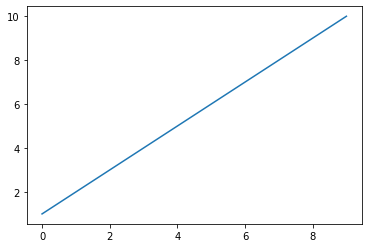

In [ ]:
serie_3 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

sns.lineplot(data=serie_3);

La ecuación de una línea recta como ésta tiene la siguiente forma:

`y = mx + b`

Entonces para predecir `y` tomamos nuestro valor `x`, lo multiplicamos por el valor `m` y le sumamos `b`. El proceso de entrenamiento de nuestro modelo lo que pretende es encontrar los valores más adecuados para `m` y `b` que minimicen nuestros errores de predicción.

---

Vamos a utilizar el modelo que viene incluido en la librería `scikit-learn` para entrenarlo:

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

# Usamos `to_frame` para convertir nuestra Serie en una estructura de 2 dimensiones, como lo requiere el modelo
lr.fit(serie_1.to_frame(), serie_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Usando nuestro modelo entrenado, usamos de nuevo nuestra variable `x` para intentar predecir `y`:

In [ ]:
y_predict = lr.predict(serie_1.to_frame())

Graficamos ahora nuestros `y` originales (azul) y los `y` predecidos (naranja):

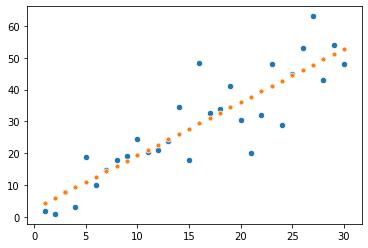

In [ ]:
sns.scatterplot(serie_1, serie_2, s=40);
sns.scatterplot(serie_1, y_predict, s=25);

Como puedes ver, cada punto azul tiene su "correspondiente" punto naranja. Algunos puntos azules y naranjas quedan exactamente en el mismo lugar (la predicción fue correcta), mientras que algunos quedan algo lejos (la predicción no fue acertada). El margen de error se visualiza en esta siguiente gráfica como una serie de líneas verdes fragmentadas:

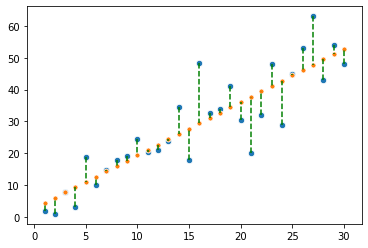

In [ ]:
sns.scatterplot(serie_1, serie_2, s=40);
sns.scatterplot(serie_1, y_predict, s=25);

for i in range(len(serie_1)):
    plt.plot([serie_1[i], serie_1[i]], [serie_2[i], y_predict[i]], 'g--')

Seguramente ya habrás notado que los puntos naranjas forman una línea:

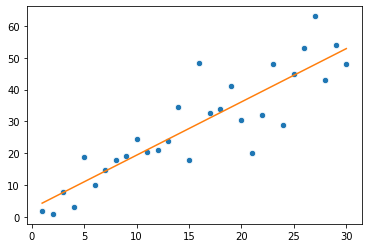

In [ ]:
sns.scatterplot(serie_1, serie_2, s=40);
sns.lineplot(serie_1, y_predict, color='#FF7F0E');

Podemos extraer la ecuación de la línea de nuestro modelo entrenado de esta manera:

In [ ]:
intercept = lr.intercept_
coefficient = lr.coef_[0]

Y por lo tanto, nuestra función predictiva es la siguiente:

In [ ]:
print(f'y = {coefficient} * x + {intercept}')

y = 1.6723248053392656 * x + 2.6889655172413818


Podemos comprobarlo de esta manera:

In [ ]:
print(f'Valor de x: {serie_1[10]}')
print(f'Valor predecido por nuestro modelo: {y_predict[10]}')
print(f'Valor cuantificado directamente usando la funcion: {coefficient * serie_1[10] + intercept}')

Valor de x: 11
Valor predecido por nuestro modelo: 21.084538375973302
Valor cuantificado directamente usando la funcion: 21.084538375973302


Para finalizar: ¿cómo cuantificamos con un valor la efectividad de nuestro modelo? Podemos usar el **coeficiente de determinación** o **R<sup>2</sup> (R al cuadrado)**. Este coeficiente nos dice qué proporción de la variabilidad de `y` puede ser explicada usando la variable `y`. En el caso de la Regresión Linear Simple, R<sup>2</sup> se puede obtener elevando al cuadrado el coeficiente de correlación de Pearson:

In [ ]:
print(f'R2: {np.power(serie_1.corr(serie_2), 2)}')

R2: 0.7831416960231877


Usando el método `score` de nuestro modelo, podemos obtener el coeficiente directamente de nuestro modelo entrenado:

In [ ]:
print(f'R2: {lr.score(serie_1.to_frame(), serie_2)}')

R2: 0.7831416960231877


### b) Práctica

Vamos a ver un ejemplo práctico utilizando nuestro dataset anterior.

In [ ]:
df = pd.read_csv('../../Datasets/diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df = df[['skin_thickness', 'bmi']]

In [ ]:
df.isna().sum()

skin_thickness    0
bmi               0
dtype: int64

In [ ]:
df = df[df > 0]

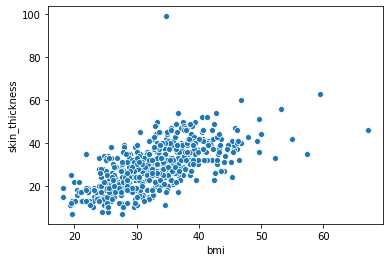

In [ ]:
sns.scatterplot(df['bmi'], df['skin_thickness']);

In [ ]:
df = df[df['skin_thickness'] < 80]
df = df[df['bmi'] < 60]

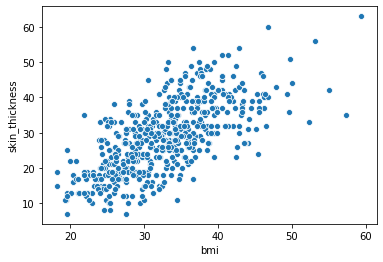

In [ ]:
sns.scatterplot(df['bmi'], df['skin_thickness']);

In [ ]:
df = df.dropna()

In [ ]:
df['bmi'].corr(df['skin_thickness'])

0.6752529282935311

In [ ]:
lr = LinearRegression()

lr.fit(df['bmi'].to_frame(), df['skin_thickness'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = lr.predict(df['bmi'].to_frame())

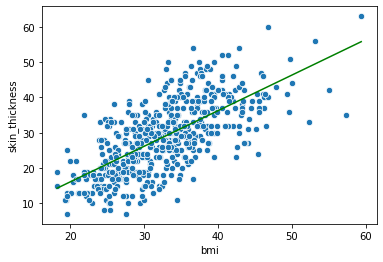

In [ ]:
sns.scatterplot(df['bmi'], df['skin_thickness'], s=40);
sns.lineplot(df['bmi'], y_predict, color='g');

In [ ]:
lr.score(df['bmi'].to_frame(), df['skin_thickness'])

0.4559665171689885

En este caso decimos entonces que nuestra variable 'bmi' explica el 45.6% de la variabilidad de nuestra variable 'skin_thickness'. Todavía tenemos algunos valores en ambas variables que tal vez podrían ser considerados valores atípicos, pero es difícil tomar esa decisión sin saber más al respecto del tema.

Este R<sup>2</sup> no es maravilloso, pero tampoco es tan terrible. Recuerda que realizar predicciones en el mundo real es extremadamente difícil.